In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv", sep=',')
df = df.iloc[:,[0,2,3]]
df

,year,name,n
0,1880,Helen,636
1,1880,Amanda,241
2,1880,Betty,117
3,1880,Dorothy,112
4,1880,Linda,27
...,...,...,...
1156,2015,Linda,423
1157,2015,Dorothy,395
1158,2015,Deborah,346
1159,2015,Patricia,346


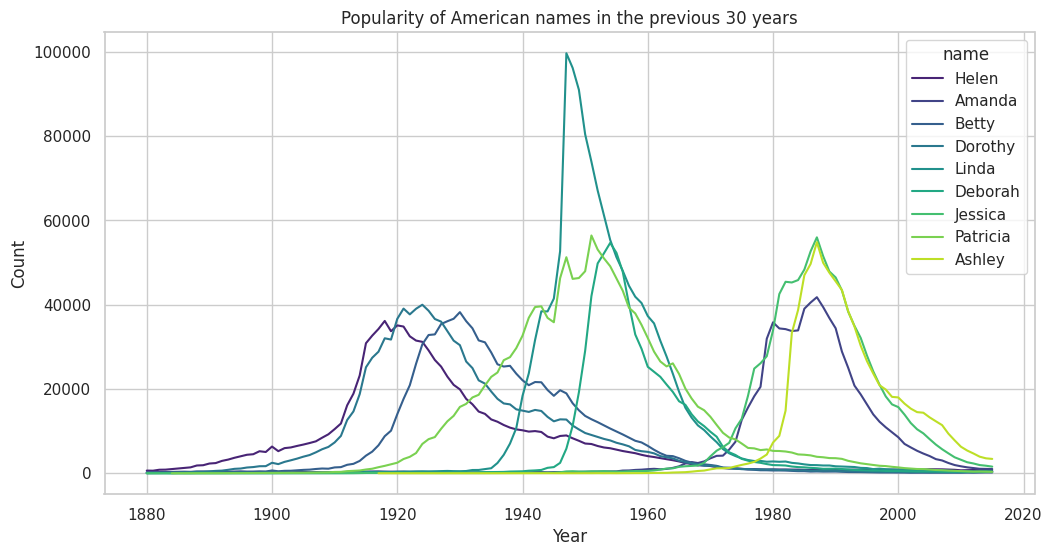

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="year", y="n", hue="name", palette="viridis")
plt.title("Popularity of American names in the previous 30 years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

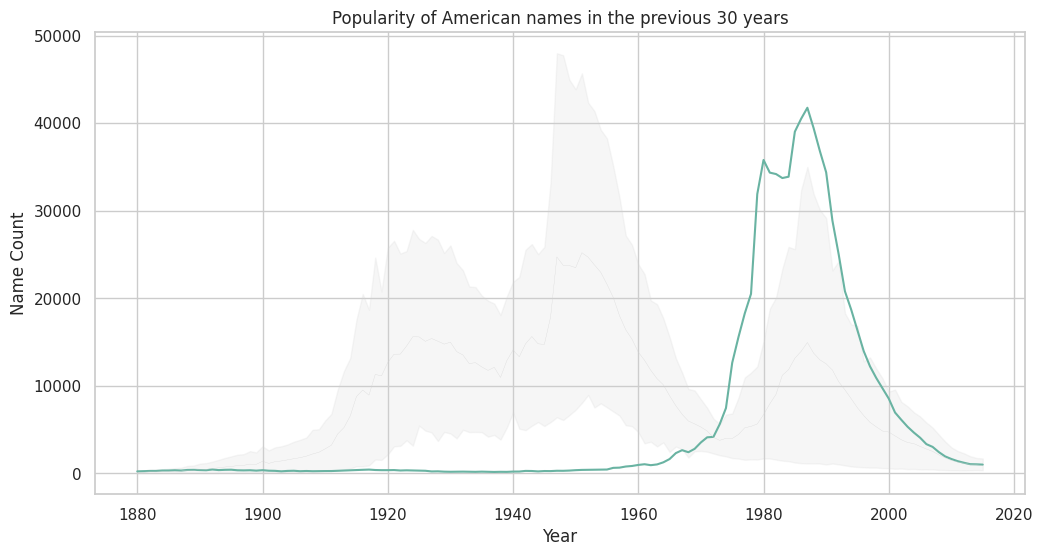

In [4]:
df["highlight"] = df.apply(lambda x: "Amanda" if x["name"] == "Amanda" else "Other", axis=1)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

# Plot lines for Amanda and other names
sns.lineplot(data=df[df["name"] == "Amanda"], x="year", y="n", hue="highlight", palette=["#69b3a2"], linewidth=1.5)
sns.lineplot(data=df[df["name"] != "Amanda"], x="year", y="n", hue="highlight", palette=["lightgrey"], linewidth=0.2)

# Add label
plt.annotate("Amanda reached 3550\nbabies in 1970", xy=(1990, 55000), xytext=(2000, 100000),
             arrowprops=dict(facecolor='#69b3a2', shrink=0.05),
             fontsize=10, color="#69b3a2")

plt.title("Popularity of American names in the previous 30 years")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.legend().remove()
plt.show()

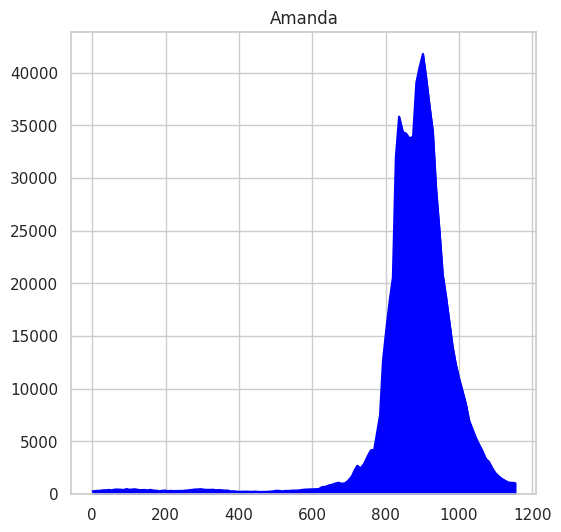

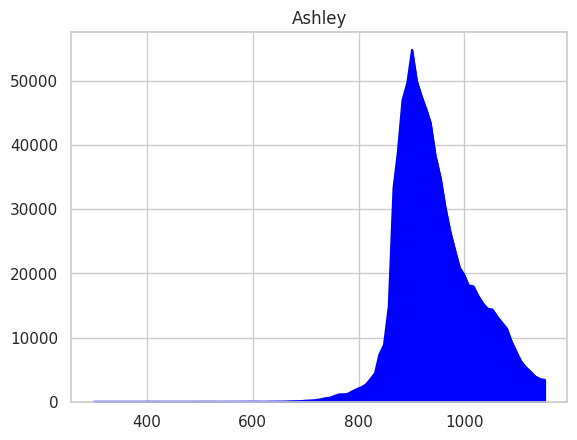

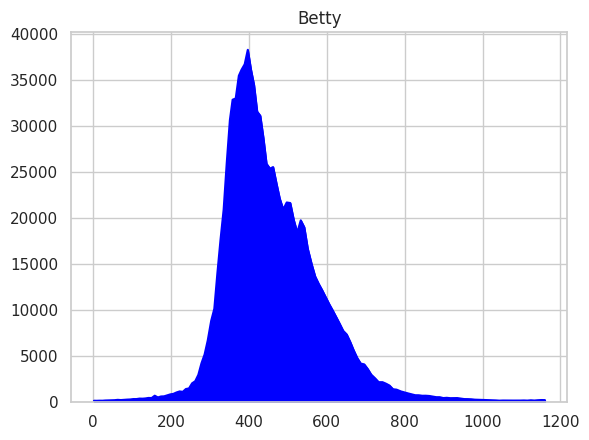

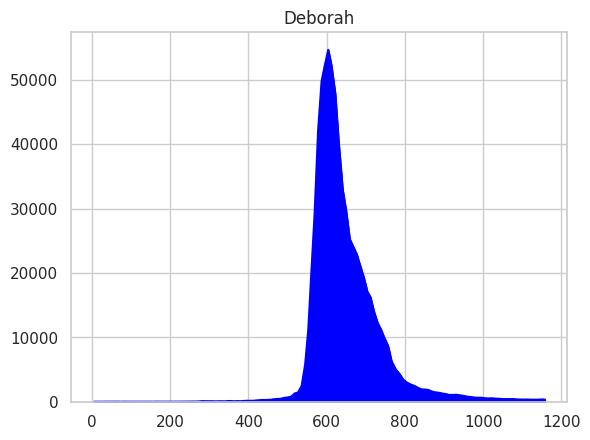

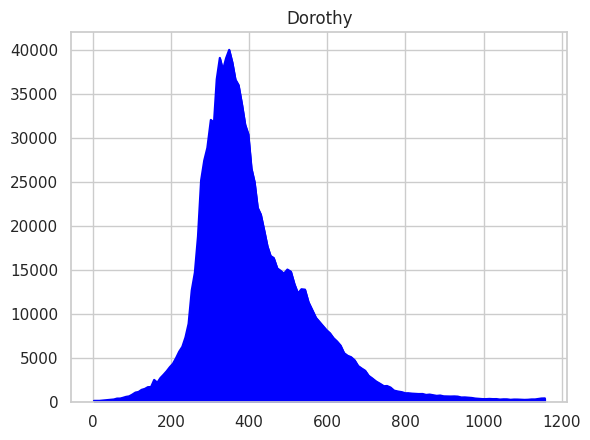

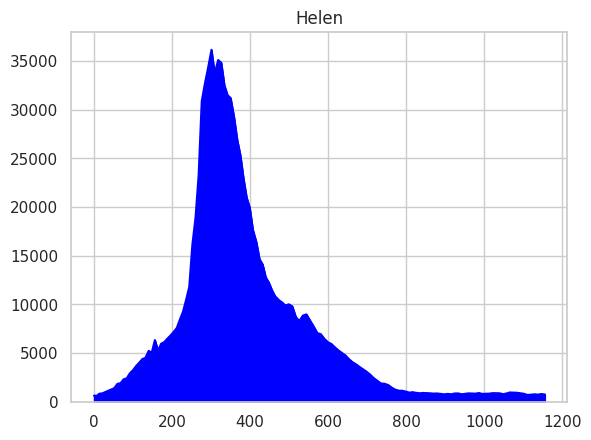

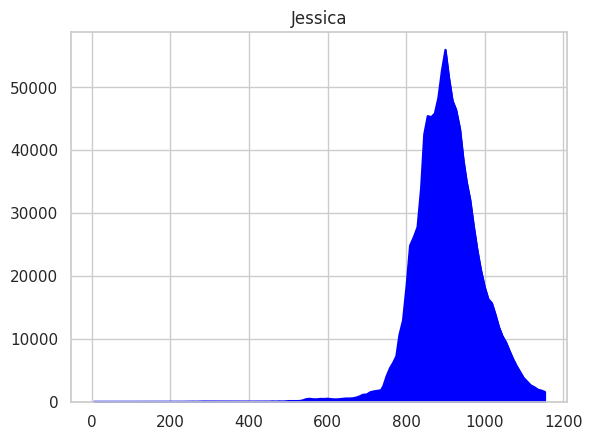

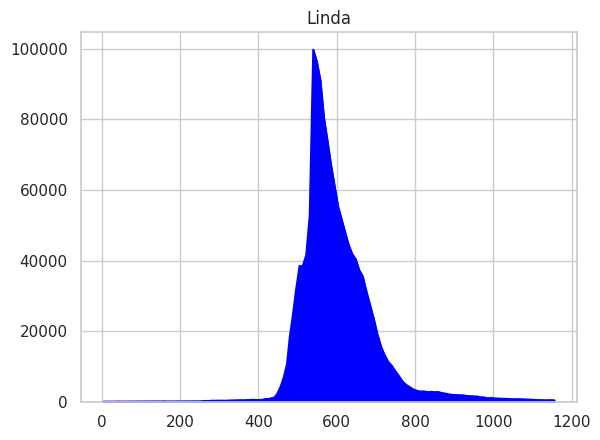

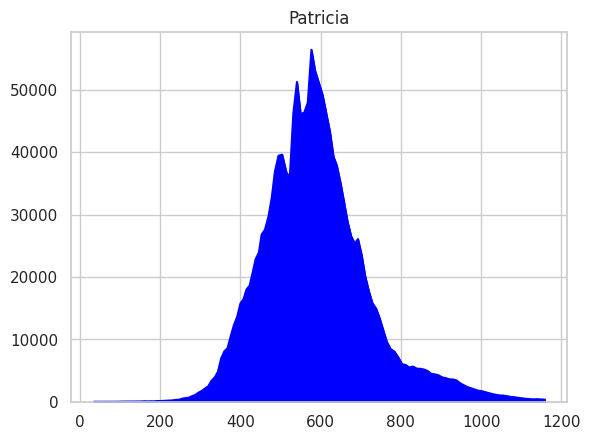

In [16]:
df_new = df.groupby('name')
df_new2=df.groupby('year')

plt.figure(figsize=(6,6))
for key, value in df_new:
    value['n'].plot.area(color='blue')
    plt.title(key)
    plt.show()



Violin and Box plot

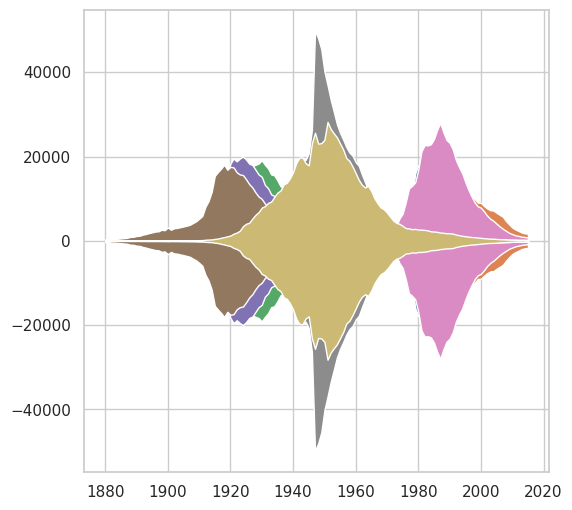

In [22]:
plt.figure(figsize=(6,6))
for key, value in df_new:
    plt.stackplot(value['year'], value['n'], baseline="sym");
plt.show()

